In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base2024 = pd.read_csv("obitos-2024.csv")
base2024

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,4
1,AC,OUTRAS,DOMICILIO,< 9,M,8
2,AC,OUTRAS,HOSPITAL,< 9,F,24
3,AC,OUTRAS,HOSPITAL,< 9,I,1
4,AC,OUTRAS,HOSPITAL,< 9,M,30
...,...,...,...,...,...,...
11339,TO,SEPTICEMIA,HOSPITAL,N/I,I,2
11340,TO,SEPTICEMIA,HOSPITAL,N/I,M,30
11341,TO,SEPTICEMIA,OUTROS_SERVICOS_SAUDE,N/I,M,1
11342,TO,SRAG,HOSPITAL,N/I,F,1


In [3]:
print(base2024.describe())

              total
count  11344.000000
mean      54.101463
std      232.571616
min        1.000000
25%        1.000000
50%        5.000000
75%       23.000000
max     6176.000000


In [4]:
print(base2024.isnull().sum())

uf              0
tipo_doenca     0
local_obito     0
faixa_etaria    0
sexo            0
total           0
dtype: int64


In [5]:
# Filtrar os dados para obter apenas os registros de mortes por COVID
covid_data = base2024[base2024['tipo_doenca'] == 'COVID']

# Agrupar os dados por estado e calcular a soma total de mortes por estado
mortes_por_estado = covid_data.groupby('uf')['total'].sum()

# Calcular a soma total de mortes por COVID
soma_total_mortes = mortes_por_estado.sum()
print(f"Soma total de mortes por COVID: {soma_total_mortes}")

# Calcular a média de mortes por estado
media_mortes_por_estado = soma_total_mortes / len(mortes_por_estado)
print(f"Média de mortes por estado: {media_mortes_por_estado:.2f}")

# Calcular a mediana de mortes por estado
mediana_mortes_por_estado = mortes_por_estado.median()
print(f"Mediana de mortes por estado: {mediana_mortes_por_estado}")

print(mortes_por_estado)

Soma total de mortes por COVID: 3638
Média de mortes por estado: 134.74
Mediana de mortes por estado: 64.0
uf
AC      15
AL      21
AM      21
AP       5
BA      94
CE      73
DF      64
ES      75
GO     153
MA      30
MG     463
MS      64
MT      83
PA      99
PB      50
PE     107
PI      32
PR     261
RJ     258
RN      48
RO      32
RR       1
RS     256
SC     120
SE      22
SP    1156
TO      35
Name: total, dtype: int64


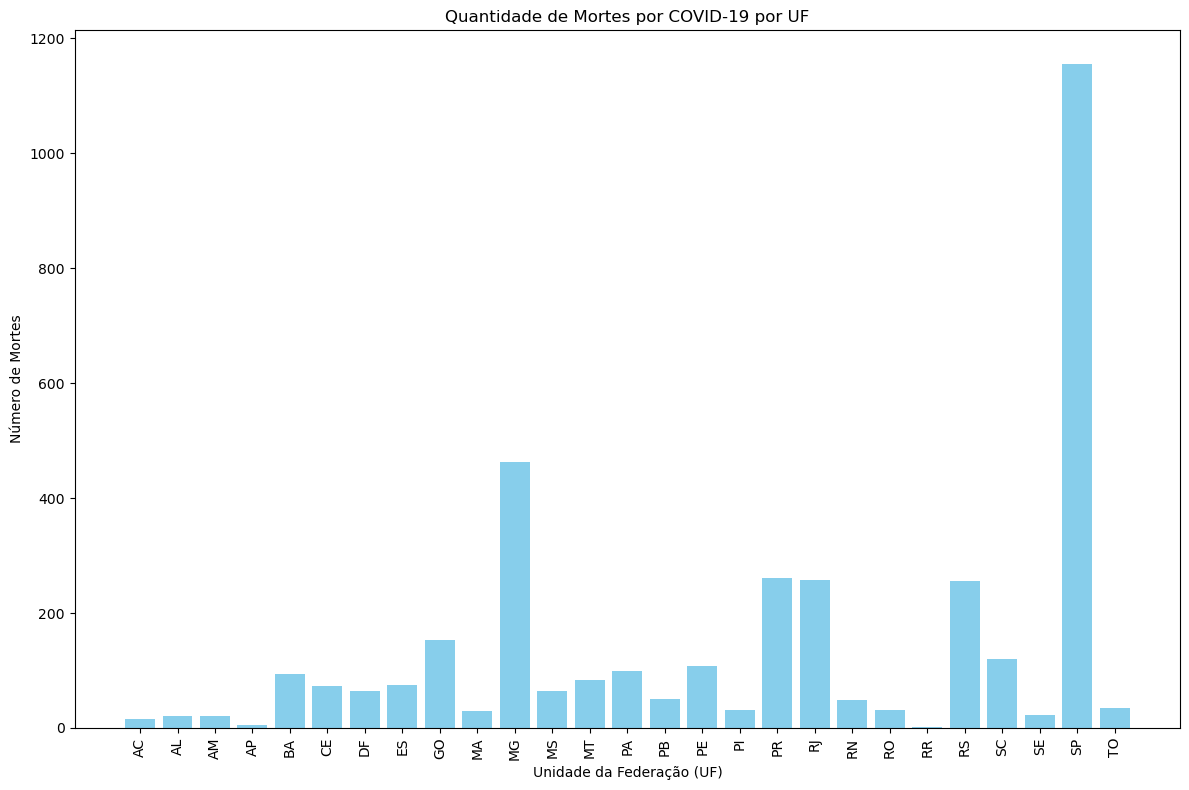

In [16]:
# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(mortes_por_estado.index, mortes_por_estado.values, color='skyblue')

plt.xlabel('Unidade da Federação (UF)')
plt.ylabel('Número de Mortes')
plt.title('Quantidade de Mortes por COVID-19 por UF')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [6]:
# Agrupar os dados por estado (UF) e sexo, calculando a soma total de mortes
mortes_por_estado_sexo = covid_data.groupby(['uf', 'sexo'])['total'].sum().unstack(fill_value=0)

# Calcular a média de mortes por sexo por UF
media_mortes_por_sexo = mortes_por_estado_sexo.mean()
print("Média de mortes por sexo por UF:")
print(media_mortes_por_sexo)

# Calcular a soma total de mortes por sexo
soma_total_mortes_sexo = mortes_por_estado_sexo.sum()
print("\nSoma total de mortes por sexo:")
print(soma_total_mortes_sexo)

# Calcular a soma total de mortes por COVID
soma_total_mortes = soma_total_mortes_sexo.sum()
print(f"\nSoma total de mortes por COVID: {soma_total_mortes}")

# Calcular o percentual de mortes por sexo em relação ao total
percentual_mortes_sexo = (soma_total_mortes_sexo / soma_total_mortes) * 100
print("\nPercentual de mortes por sexo em relação ao total:")
print(percentual_mortes_sexo)

Média de mortes por sexo por UF:
sexo
F    64.111111
I     0.037037
M    70.592593
dtype: float64

Soma total de mortes por sexo:
sexo
F    1731
I       1
M    1906
dtype: int64

Soma total de mortes por COVID: 3638

Percentual de mortes por sexo em relação ao total:
sexo
F    47.581089
I     0.027488
M    52.391424
dtype: float64


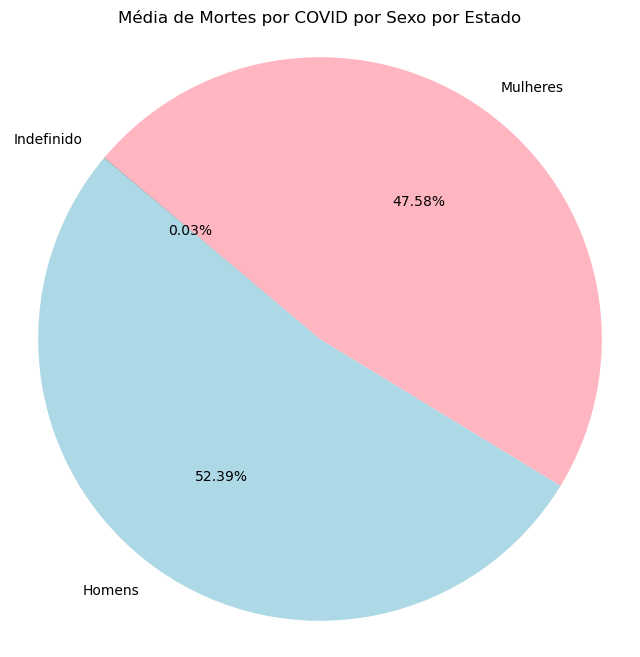

In [7]:
# Dados para o gráfico de sexo de cada obito
labels = ['Homens', 'Mulheres', 'Indefinido']
sizes = [media_mortes_por_sexo['M'], media_mortes_por_sexo['F'], media_mortes_por_sexo['I']]
colors = ['lightblue','lightpink','gray']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Média de Mortes por COVID por Sexo por Estado')
plt.axis('equal')
plt.show()

In [8]:
# Agrupar os dados por faixa etária, calculando a soma total de mortes
mortes_por_faixa_etaria = covid_data.groupby('faixa_etaria')['total'].sum()

# Identificar a faixa etária com o maior número de óbitos
faixa_mais_obitos = mortes_por_faixa_etaria.idxmax()
total_obitos_faixa_mais_obitos = mortes_por_faixa_etaria.max()

# Calcular a soma total de mortes por COVID
soma_total_mortes = mortes_por_faixa_etaria.sum()

# Calcular a porcentagem da faixa etária com mais óbitos em relação ao total
percentual_faixa_mais_obitos = (total_obitos_faixa_mais_obitos / soma_total_mortes) * 100

print(f"A maior parte dos óbitos por COVID aconteceu na faixa etária de {faixa_mais_obitos}.")
print(f"Essa faixa representa {percentual_faixa_mais_obitos:.2f}% do total de óbitos por COVID no Brasil.")

A maior parte dos óbitos por COVID aconteceu na faixa etária de 80 - 89.
Essa faixa representa 28.34% do total de óbitos por COVID no Brasil.


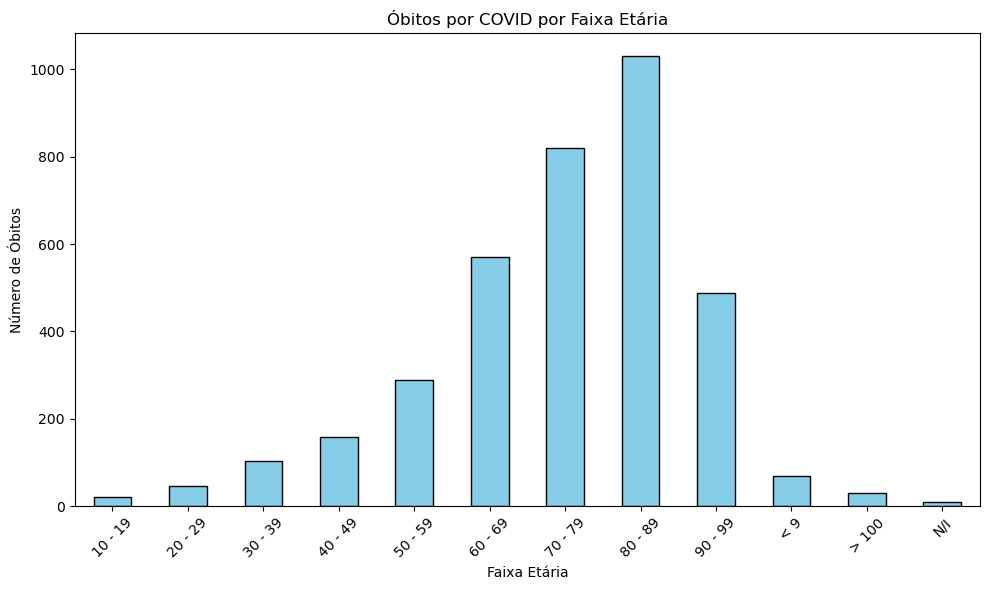

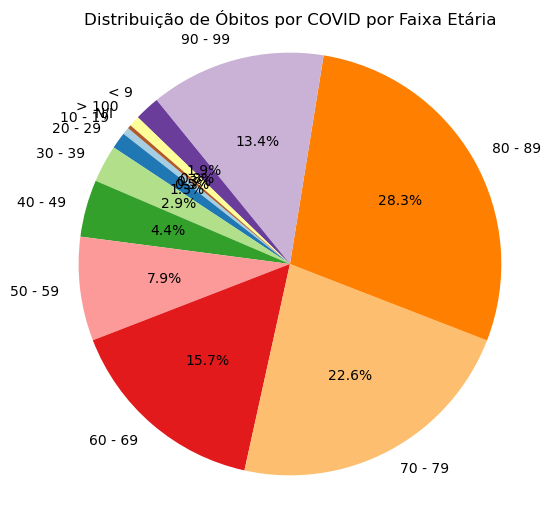

In [9]:
# Gráfico de barras das mortes por faixa etária
plt.figure(figsize=(10, 6))
mortes_por_faixa_etaria.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Óbitos por COVID por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de pizza para a distribuição das mortes por faixa etária
plt.figure(figsize=(6, 6))
mortes_por_faixa_etaria.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(mortes_por_faixa_etaria))))
plt.title('Distribuição de Óbitos por COVID por Faixa Etária')
plt.ylabel('') 
plt.axis('equal')
plt.show()

In [10]:
# Calcular a porcentagem de óbitos de pessoas com 60 anos ou mais
porcentagem_idosos = mortes_por_faixa_etaria['60-79':].sum() / mortes_por_faixa_etaria.sum() * 100

print(f"Porcentagem de óbitos de idosos (60 anos ou mais): {porcentagem_idosos:.2f}%")

Porcentagem de óbitos de idosos (60 anos ou mais): 67.34%


In [11]:
# Definir locais considerados adequados
locais_adequados = ['HOSPITAL', 'POSTO_SAUDE', 'OUTROS_SERVICOS_SAUDE']

# Criar uma cópia do DataFrame para evitar o SettingWithCopyWarning
covid_data = covid_data.copy()

# Criar a nova coluna usando loc e uma função lambda
covid_data.loc[:, 'local_adequado'] = covid_data['local_obito'].apply(lambda x: 'Adequado' if x in locais_adequados else 'Inadequado')

# Agrupar os dados por local adequado/inadequado e calcular a soma total de mortes
mortes_por_local = covid_data.groupby('local_adequado')['total'].sum()

# Calcular a quantidade total de mortes por COVID
soma_total_mortes = mortes_por_local.sum()

# Calcular os valores específicos e percentuais para locais adequados, inadequados e desconhecidos
mortes_adequadas = mortes_por_local.get('Adequado', 0)
mortes_inadequadas = mortes_por_local.get('Inadequado', 0)
mortes_desconhecidas = soma_total_mortes - (mortes_adequadas + mortes_inadequadas)

percentual_adequadas = (mortes_adequadas / soma_total_mortes) * 100
percentual_inadequadas = (mortes_inadequadas / soma_total_mortes) * 100
percentual_desconhecidas = (mortes_desconhecidas / soma_total_mortes) * 100
print(f"Da quantidade total de {soma_total_mortes} óbitos por COVID, {mortes_adequadas} ocorreram em locais adequados, o que representa aproximadamente {percentual_adequadas:.2f}% da quantidade total.")
print(f"Sendo assim, outros {mortes_inadequadas} óbitos ocorreram em locais inadequados, representando cerca de {percentual_inadequadas:.2f}% do total.")
print(f"E outros {mortes_desconhecidas} não há informações sobre o local dos óbitos, sendo esses {percentual_desconhecidas:.2f}% dos óbitos.")

Da quantidade total de 3638 óbitos por COVID, 3410 ocorreram em locais adequados, o que representa aproximadamente 93.73% da quantidade total.
Sendo assim, outros 228 óbitos ocorreram em locais inadequados, representando cerca de 6.27% do total.
E outros 0 não há informações sobre o local dos óbitos, sendo esses 0.00% dos óbitos.


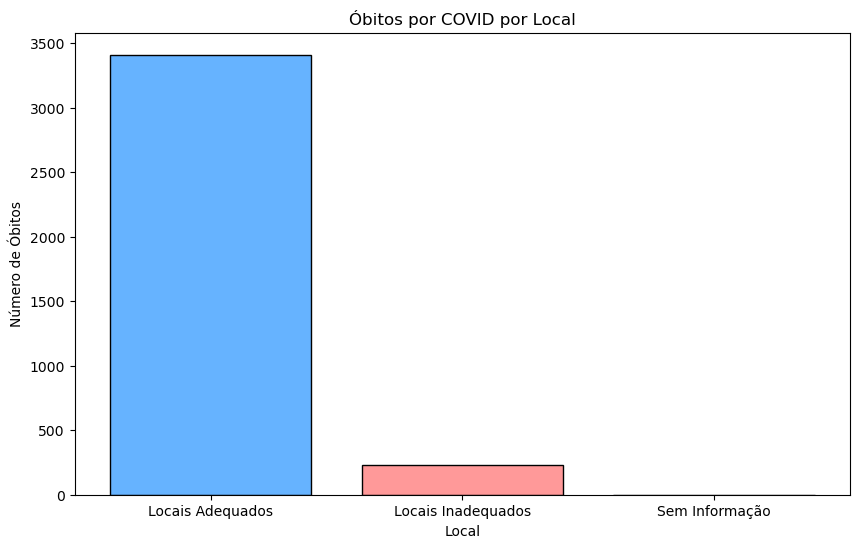

In [12]:
# Criando grafico relativo a local dos obitos
labels = ['Locais Adequados', 'Locais Inadequados', 'Sem Informação']
sizes = [mortes_adequadas, mortes_inadequadas, mortes_desconhecidas]
colors = ['#66b3ff', '#ff9999', '#99ff99']

# Gráfico de barras dos óbitos por local adequado/inadequado
plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=colors, edgecolor='black')
plt.title('Óbitos por COVID por Local')
plt.xlabel('Local')
plt.ylabel('Número de Óbitos')
plt.show()

In [13]:
# Calcular o desvio padrão das mortes por COVID por estado
desvio_padrao = mortes_por_estado.std()
print(f"Desvio padrão do número de mortes por COVID por estado: {desvio_padrao:.2f}")

# Calcular a média das mortes por COVID por estado
media_mortes_por_estado = mortes_por_estado.mean()
print(f"Média do número de mortes por COVID por estado: {media_mortes_por_estado:.2f}")

# Calcular o coeficiente de variação (CV)
coeficiente_variacao = (desvio_padrao / media_mortes_por_estado) * 100
print(f"Coeficiente de variação (CV): {coeficiente_variacao:.2f}%")

Desvio padrão do número de mortes por COVID por estado: 229.15
Média do número de mortes por COVID por estado: 134.74
Coeficiente de variação (CV): 170.07%


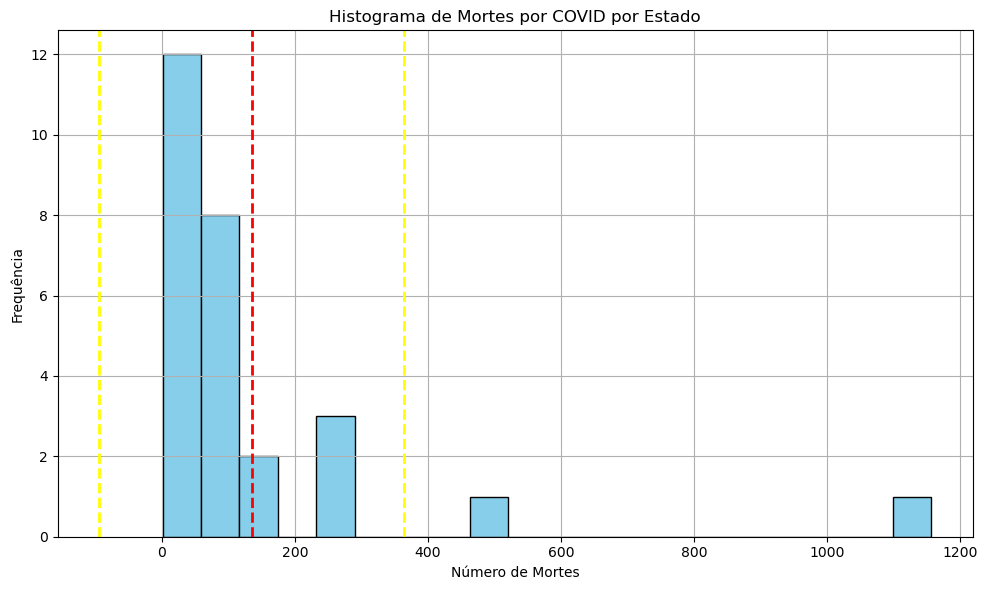

In [14]:
# Criar o histograma
plt.figure(figsize=(10, 6))
mortes_por_estado.plot(kind="hist", bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Número de Mortes")
plt.ylabel("Frequência")
plt.title("Histograma de Mortes por COVID por Estado")
plt.axvline(x=media_mortes_por_estado, color="red", linestyle="dashed", linewidth=2, label=f"Média: {media_mortes_por_estado:.2f}")
plt.axvline(x=media_mortes_por_estado + desvio_padrao, color="yellow", linestyle="dashed", linewidth=2, label=f"Média + Desvio Padrão: {(media_mortes_por_estado + desvio_padrao):.2f}")
plt.axvline(x=media_mortes_por_estado - desvio_padrao, color="yellow", linestyle="dashed", linewidth=2, label=f"Média - Desvio Padrão: {(media_mortes_por_estado - desvio_padrao):.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()

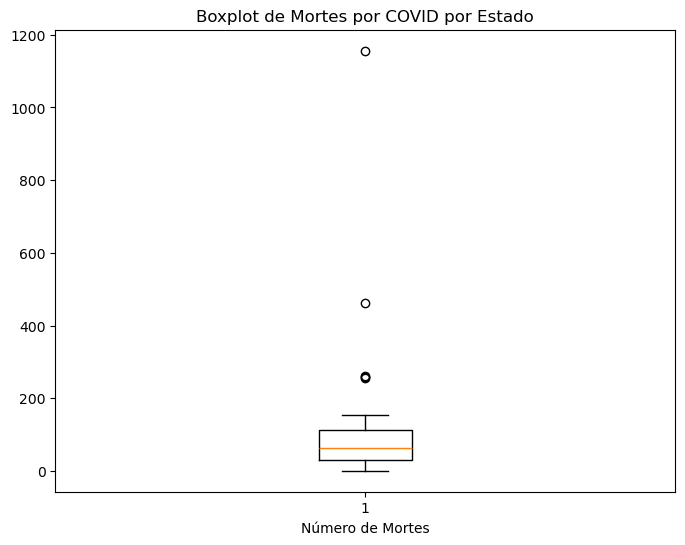

In [15]:
# Criar o boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(mortes_por_estado)

plt.xlabel("Número de Mortes")
plt.title("Boxplot de Mortes por COVID por Estado")
plt.show()